In [1]:
import sys
import pandas as pd
import numpy as np
import sklearn
import keras
import matplotlib.pyplot as plt

from matplotlib import style
style.use("ggplot")

from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.cluster import KMeans


from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

from keras.utils.np_utils import to_categorical



Using TensorFlow backend.


In [2]:
df = pd.read_csv("/Users/tommykwan/Documents/MachineLearning/KMeansClustering/NBA_Clustering/season_data_2018_2019.csv")


In [3]:
df.head(2)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Alex Abrines\abrinal01,SG,25,OKC,31,2,19.0,1.8,5.1,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2,Quincy Acy\acyqu01,PF,28,PHO,10,0,12.3,0.4,1.8,...,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7


In [4]:
df = df.drop_duplicates(keep = 'first')

In [5]:
df = df[df['G'] > 50]
df = df[df['Three_PA'] > 1.5]
df = df[df['FGA'] > 3]
df = df[df['MP'] > 15]
df = df.dropna()
df = df[["Two_PP","Three_PP"]]
print(df)

X = np.array(df)




     Two_PP  Three_PP
12    0.514     0.343
19    0.641     0.256
22    0.574     0.332
23    0.527     0.373
24    0.493     0.334
27    0.511     0.421
38    0.439     0.395
43    0.519     0.389
46    0.465     0.320
47    0.548     0.351
48    0.560     0.402
50    0.468     0.372
52    0.508     0.289
55    0.513     0.429
56    0.421     0.397
59    0.539     0.401
61    0.582     0.329
63    0.462     0.360
64    0.538     0.425
68    0.536     0.326
70    0.446     0.351
77    0.548     0.335
78    0.553     0.325
81    0.544     0.426
85    0.529     0.344
87    0.558     0.361
89    0.523     0.348
91    0.483     0.377
94    0.463     0.352
97    0.428     0.363
..      ...       ...
596   0.602     0.369
599   0.427     0.269
604   0.511     0.364
605   0.477     0.322
608   0.455     0.326
615   0.522     0.397
624   0.472     0.371
629   0.483     0.373
631   0.515     0.341
643   0.516     0.402
646   0.409     0.377
647   0.562     0.400
649   0.466     0.394
650   0.44

In [6]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print(centroids)
print(labels)

[[0.51015789 0.4002807 ]
 [0.46097674 0.34645349]
 [0.61144444 0.33261111]
 [0.53763492 0.33636508]]
[3 2 3 0 1 0 1 0 1 3 0 1 3 0 1 0 2 1 0 3 1 3 3 0 3 3 3 0 1 1 1 1 3 1 0 1 1
 3 2 3 0 1 2 3 1 3 0 0 3 3 3 3 1 3 2 3 3 2 1 3 3 0 3 1 0 0 1 1 1 0 0 0 1 1
 0 1 0 3 3 0 2 3 1 3 2 1 1 0 0 0 3 3 3 1 0 3 3 1 1 2 1 2 2 1 0 3 0 3 3 3 1
 3 3 1 2 3 1 1 1 3 1 1 0 2 1 0 1 3 3 1 0 2 3 3 0 3 3 2 3 3 1 1 3 1 1 0 0 1
 0 1 1 0 3 1 1 0 0 1 0 1 1 3 1 1 3 1 1 2 1 3 3 1 0 2 0 3 0 1 3 0 0 1 1 1 0
 0 0 1 1 1 1 0 0 1 2 1 0 1 1 0 1 1 3 0 1 0 0 1 0 1 3 3 1 1 0 1 3 1 1 0 1 1
 3 1]


In [7]:
df2 = pd.read_csv("/Users/tommykwan/Documents/MachineLearning/KMeansClustering/NBA_Clustering/season_data_2018_2019.csv")
df2 = df2.drop_duplicates(keep = 'first')

19    Giannis Antetokounmpo
159    Stephen Curry
268    Maurice Harkless
272    Joe Harris
315    Serge Ibaka
504    Dirk Nowitzki
548    Dwight Powell
599    Jonathon Simmons
675    Russell Westbrook


Text(0, 0.5, '3P%')

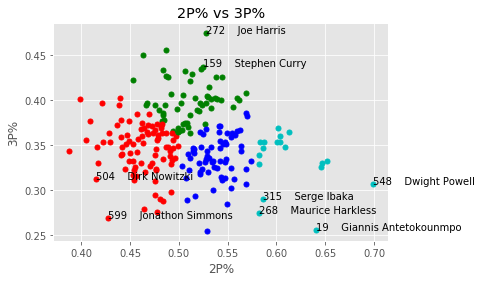

In [8]:
colors = ["g.","r.","c.","b."]
ax = plt.subplot()

for i in range(len(X)):
#     print("coordinate:",X[i], "label:", labels[i])
    ax.plot(X[i][0], X[i][1],colors[labels[i]], markersize=10)
    if X[i][0] > np.percentile(X[:,0],90) and X[i][1] > np.percentile(X[:,1],90):
        txt = df2.loc[(df2['Two_PP'] == X[i][0]) & (df2['Three_PP'] == X[i][1]),'Player']
        txt = txt.to_string().split('\\')[0]
        print(txt)
        ax.annotate(txt,[X[i][0],X[i][1]],rotation = 0)
        
    if X[i][0] < np.percentile(X[:,0],10) and X[i][1] < np.percentile(X[:,1],10):
        txt = df2.loc[(df2['Two_PP'] == X[i][0]) & (df2['Three_PP'] == X[i][1]),'Player']
        txt = txt.to_string().split('\\')[0]
        print(txt)
        ax.annotate(txt,[X[i][0],X[i][1]],rotation = 0)
        
    if X[i][0] > np.percentile(X[:,0],90) and X[i][1] < np.percentile(X[:,1],10):
        txt = df2.loc[(df2['Two_PP'] == X[i][0]) & (df2['Three_PP'] == X[i][1]),'Player']
        txt = txt.to_string().split('\\')[0]
        print(txt)
        ax.annotate(txt,[X[i][0],X[i][1]],rotation = 0)
        
    if X[i][0] < np.percentile(X[:,0],10) and X[i][1] > np.percentile(X[:,1],90):
        txt = df2.loc[(df2['Two_PP'] == X[i][0]) & (df2['Three_PP'] == X[i][1]),'Player']
        txt = txt.to_string().split('\\')[0]
        print(txt)
        ax.annotate(txt,[X[i][0],X[i][1]],rotation = 0)
        
    if (df2.loc[(df2['Two_PP'] == X[i][0]) & (df2['Three_PP'] == X[i][1]),'Player'].to_string().split('\\')[0]) == "159    Stephen Curry":
        txt = df2.loc[(df2['Two_PP'] == X[i][0]) & (df2['Three_PP'] == X[i][1]),'Player']
        txt = txt.to_string().split('\\')[0]
        print(txt)
        ax.annotate(txt,[X[i][0],X[i][1]],rotation = 0)
        
    if (df2.loc[(df2['Two_PP'] == X[i][0]) & (df2['Three_PP'] == X[i][1]),'Player'].to_string().split('\\')[0]) == "272    Joe Harris":
        txt = df2.loc[(df2['Two_PP'] == X[i][0]) & (df2['Three_PP'] == X[i][1]),'Player']
        txt = txt.to_string().split('\\')[0]
        print(txt)
        ax.annotate(txt,[X[i][0],X[i][1]],rotation = 0)
        
    if (df2.loc[(df2['Two_PP'] == X[i][0]) & (df2['Three_PP'] == X[i][1]),'Player'].to_string().split('\\')[0]) == "675    Russell Westbrook":
        txt = df2.loc[(df2['Two_PP'] == X[i][0]) & (df2['Three_PP'] == X[i][1]),'Player']
        txt = txt.to_string().split('\\')[0]
        print(txt)

ax.set_title('2P% vs 3P%')
ax.set_xlabel('2P%')
ax.set_ylabel('3P%')

        

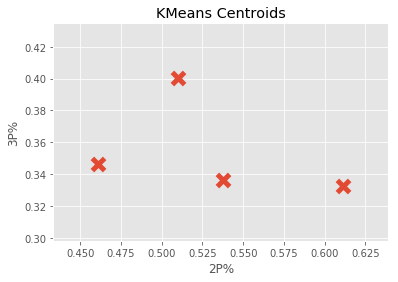

In [9]:
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=150,linewidth=5)
plt.title('KMeans Centroids')
plt.xlabel('2P%')
plt.ylabel('3P%')
plt.show()



In [10]:
##########################################################################################
# OBPM vs. DBPM

In [11]:
df = pd.read_csv("/Users/tommykwan/Documents/MachineLearning/KMeansClustering/NBA_Clustering/nba_advanced_stats_2018_2019.csv")


In [12]:
df.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,Alex Abrines\abrinal01,SG,25,OKC,31,588,6.3,0.507,0.809,...,7.9,12.2,0.1,0.6,0.6,0.053,-2.4,-0.9,-3.4,-0.2
1,2,Quincy Acy\acyqu01,PF,28,PHO,10,123,2.9,0.379,0.833,...,15.2,9.2,-0.1,0.0,-0.1,-0.022,-5.7,-0.3,-5.9,-0.1
2,3,Jaylen Adams\adamsja01,PG,22,ATL,34,428,7.6,0.474,0.673,...,19.7,13.5,-0.1,0.2,0.1,0.011,-3.1,-1.3,-4.4,-0.3
3,4,Steven Adams\adamsst01,C,25,OKC,80,2669,18.5,0.591,0.002,...,12.6,16.4,5.1,4.0,9.1,0.163,0.6,2.1,2.7,3.2
4,5,Bam Adebayo\adebaba01,C,21,MIA,82,1913,17.9,0.623,0.031,...,17.1,15.8,3.4,3.4,6.8,0.171,-0.6,3.6,3.0,2.4


In [13]:
df = df.drop_duplicates(keep = 'first')

In [14]:
df = df[df['G'] > 50]
df = df[df['MP'] > 750]
df = df.dropna()
df = df[['OBPM','DBPM']]
print(df)

X = np.array(df)


     OBPM  DBPM
3     0.6   2.1
4    -0.6   3.6
7     1.2   0.5
10   -0.7   3.2
12    0.1   0.8
19    5.7   5.0
22   -1.3   0.1
23   -0.1  -1.0
24   -0.1  -0.4
27    1.7  -2.0
28   -0.1   0.2
30   -1.2  -0.7
38   -0.6  -1.8
43   -0.1   0.9
45   -1.2   1.4
46   -2.2   0.0
47    3.9  -1.1
48    1.4  -1.9
50    0.3  -2.4
51   -3.1   2.8
52   -3.3   1.1
55    1.6  -0.4
56    1.2   1.2
58   -2.5   1.5
59    0.8   1.2
60   -4.7  -3.7
61    2.5   1.0
63    0.5  -1.2
64    1.4  -1.4
68    3.8  -3.0
..    ...   ...
620  -0.9  -2.2
624  -1.7  -0.4
629  -1.4   0.6
631  -1.7   0.6
639   0.8   1.5
643   1.2  -2.0
646  -1.2  -1.0
647   4.8   2.0
649  -2.2  -2.0
650  -0.5   1.8
651  -2.5   0.7
652  -1.4   4.7
659   0.7  -0.7
660  -1.6   1.6
661   3.0   3.4
662  -0.4   0.0
665   5.1  -1.7
669  -0.4  -1.5
675   2.5   3.9
676  -0.2   1.1
678  -2.2   3.0
679  -1.7  -1.3
684   3.1  -2.6
685  -0.2   0.5
689  -1.1   1.0
693   0.0   1.5
698   0.8   2.1
699   1.8  -2.8
704  -1.7  -1.4
705  -1.2   1.0

[288 ro

In [15]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print(centroids)
print(labels)

[[-1.925      -0.42065217]
 [-0.07236842  1.98815789]
 [ 4.43928571  0.78214286]
 [ 0.63043478 -1.49565217]]
[1 1 1 1 1 2 0 3 3 3 1 0 3 1 1 0 2 3 3 1 0 3 1 0 1 0 2 3 3 3 0 0 0 3 0 0 0
 3 3 3 3 0 2 2 3 1 0 3 1 0 0 0 3 3 1 3 2 1 3 1 0 1 1 3 2 3 2 1 1 1 0 1 3 2
 0 1 0 2 3 1 0 0 1 0 3 1 3 3 3 0 2 3 1 1 1 2 3 0 0 1 1 3 1 0 1 1 3 0 3 2 3
 2 1 2 0 0 3 3 3 0 0 1 0 3 0 3 0 2 0 0 1 3 1 0 1 1 0 1 0 2 1 0 0 1 0 3 0 3
 2 3 0 0 0 2 1 3 1 0 3 3 0 1 0 3 3 0 3 3 3 3 3 2 3 2 0 3 0 1 1 0 2 0 0 0 0
 3 3 3 0 3 1 0 0 3 0 3 3 1 3 3 3 3 0 3 3 3 3 1 3 1 0 1 0 1 0 0 0 1 3 0 1 0
 3 0 2 1 1 3 2 0 3 3 3 0 1 3 3 0 1 2 1 3 3 3 0 0 0 3 3 3 0 1 1 0 1 0 0 0 3
 0 0 0 1 3 0 2 0 1 0 1 3 1 2 0 2 3 1 1 1 0 3 1 1 1 1 3 0 1]


In [16]:
df2 = pd.read_csv("/Users/tommykwan/Documents/MachineLearning/KMeansClustering/NBA_Clustering/nba_advanced_stats_2018_2019.csv")
df2 = df2.drop_duplicates(keep = 'first')

19    Giannis Antetokounmpo
51    Jordan Bell
60    Antonio Blakeney
68    Devin Booker
159    Stephen Curry
161    Anthony Davis
272    Joe Harris
353    Nikola Jokic
375    Kevin Knox
515    Elie Okobo
555    J.J. Redick
661    Nikola Vucevic
675    Russell Westbrook
684    Lou Williams


Text(0, 0.5, 'DBPM')

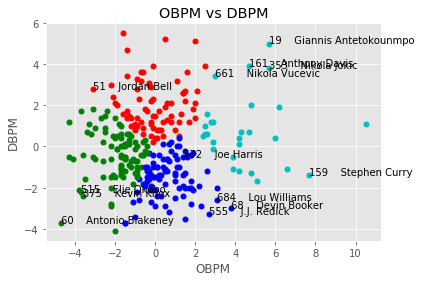

In [17]:
colors = ["g.","r.","c.","b."]
ax = plt.subplot()

for i in range(len(X)):
#     print("coordinate:",X[i], "label:", labels[i])
    ax.plot(X[i][0], X[i][1],colors[labels[i]], markersize=10)
    if X[i][0] > np.percentile(X[:,0],90) and X[i][1] > np.percentile(X[:,1],90):
        txt = df2.loc[(df2['OBPM'] == X[i][0]) & (df2['DBPM'] == X[i][1]),'Player']
        txt = txt.to_string().split('\\')[0]
        print(txt)
        ax.annotate(txt,[X[i][0],X[i][1]],rotation = 0)
        
    if X[i][0] < np.percentile(X[:,0],10) and X[i][1] < np.percentile(X[:,1],10):
        txt = df2.loc[(df2['OBPM'] == X[i][0]) & (df2['DBPM'] == X[i][1]),'Player']
        txt = txt.to_string().split('\\')[0]
        print(txt)
        ax.annotate(txt,[X[i][0],X[i][1]],rotation = 0)
        
    if X[i][0] > np.percentile(X[:,0],90) and X[i][1] < np.percentile(X[:,1],10):
        txt = df2.loc[(df2['OBPM'] == X[i][0]) & (df2['DBPM'] == X[i][1]),'Player']
        txt = txt.to_string().split('\\')[0]
        print(txt)
        ax.annotate(txt,[X[i][0],X[i][1]],rotation = 0)
        
    if X[i][0] < np.percentile(X[:,0],10) and X[i][1] > np.percentile(X[:,1],90):
        txt = df2.loc[(df2['OBPM'] == X[i][0]) & (df2['DBPM'] == X[i][1]),'Player']
        txt = txt.to_string().split('\\')[0]
        print(txt)
        ax.annotate(txt,[X[i][0],X[i][1]],rotation = 0)
        
    if (df2.loc[(df2['OBPM'] == X[i][0]) & (df2['DBPM'] == X[i][1]),'Player'].to_string().split('\\')[0]) == "159    Stephen Curry":
        txt = df2.loc[(df2['OBPM'] == X[i][0]) & (df2['DBPM'] == X[i][1]),'Player']
        txt = txt.to_string().split('\\')[0]
        print(txt)
        ax.annotate(txt,[X[i][0],X[i][1]],rotation = 0)
        
    if (df2.loc[(df2['OBPM'] == X[i][0]) & (df2['DBPM'] == X[i][1]),'Player'].to_string().split('\\')[0]) == "272    Joe Harris":
        txt = df2.loc[(df2['OBPM'] == X[i][0]) & (df2['DBPM'] == X[i][1]),'Player']
        txt = txt.to_string().split('\\')[0]
        print(txt)
        ax.annotate(txt,[X[i][0],X[i][1]],rotation = 0)
        
    if (df2.loc[(df2['OBPM'] == X[i][0]) & (df2['DBPM'] == X[i][1]),'Player'].to_string().split('\\')[0]) == "675    Russell Westbrook":
        txt = df2.loc[(df2['OBPM'] == X[i][0]) & (df2['DBPM'] == X[i][1]),'Player']
        txt = txt.to_string().split('\\')[0]
        print(txt)

ax.set_title('OBPM vs DBPM')
ax.set_xlabel('OBPM')
ax.set_ylabel('DBPM')

        

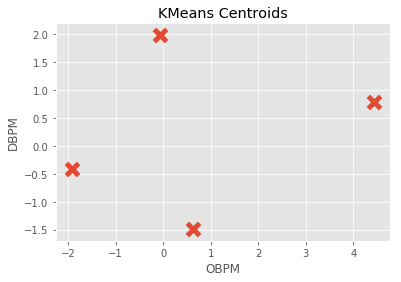

In [18]:
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=150,linewidth=5)
plt.title('KMeans Centroids')
plt.xlabel('OBPM')
plt.ylabel('DBPM')
plt.show()

